## NOTEBOOK 10

In this  notebook we are going to integrate the genetic algorithm of the previous lessonin order to integrate a way:

- to perform a simulated annealing search of the best path
- to use MPI library to perform more than one search of the best path in parallel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### EXERCISE 10.1

In this first exercise we are going to solve the TSP with a **Simulated Annealing** (SA) algorithm. Now we no longer have a *population* of different individuals but a single solution candidate.

The solution coded in the individual is randomly mutated using the mutation operators developed in the previous lesson and then this mutation is accepted or reject according to the simulated annealing criterium:

- if the path of the new solution is shorter than the previous one the mutation is accepted
- if instead the new path is longer, the solution is accepted with probability $e^{-(l_{new}-l_{old})/T}$, where T is the temperature of the system ($k_{B}=1$) that is chosen step by step in order to simulate its cooling. 


Now, as a first thing, we generate the two city configuration, on a circumference and inside a square.

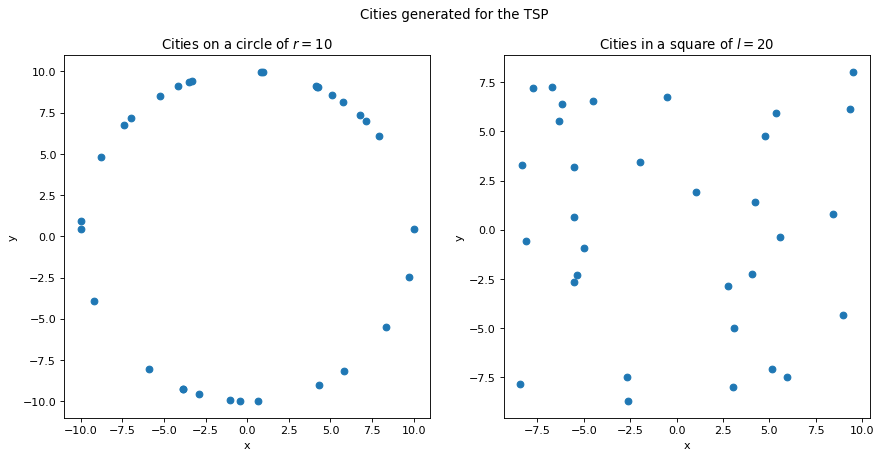

In [2]:
circle=np.loadtxt("circle.dat")
square=np.loadtxt("square.dat")

xc=np.zeros(len(circle))
yc=np.zeros(len(circle))

xs=np.zeros(len(square))
ys=np.zeros(len(square))

for i in range(len(xc)):
    xc[i]=circle[i][0]
    yc[i]=circle[i][1]
    
for i in range(len(xs)):
    xs[i]=square[i][0]
    ys[i]=square[i][1]
    
    
##Plot

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,6), dpi=80)

fig.suptitle("Cities generated for the TSP")

ax1.scatter(xc,yc)
ax1.set_title('Cities on a circle of $r=10$')
ax1.set(xlabel='x', ylabel='y')


ax2.scatter(xs,ys)
ax2.set_title('Cities in a square of $l=20$')
ax2.set(xlabel='x', ylabel='y')

plt.show()
plt.close()

Then we create an initial solution candidate and choose to iterate the mutation of the solution $n_{it}=10^{5}$ times.

The initial temperature is chosen to be $T_{0}=50$ and the cooling proceeds gradualli for the first $10^{3}$ steps until $T=1.0$, then it is set equal to $0.3$ and then, after other $10^{3}$ steps, equal to $0.001$; finally, after $10^{4}$ steps, set to $0.0001$


We can show the length of the best path as a function of the iteration of our algorithm

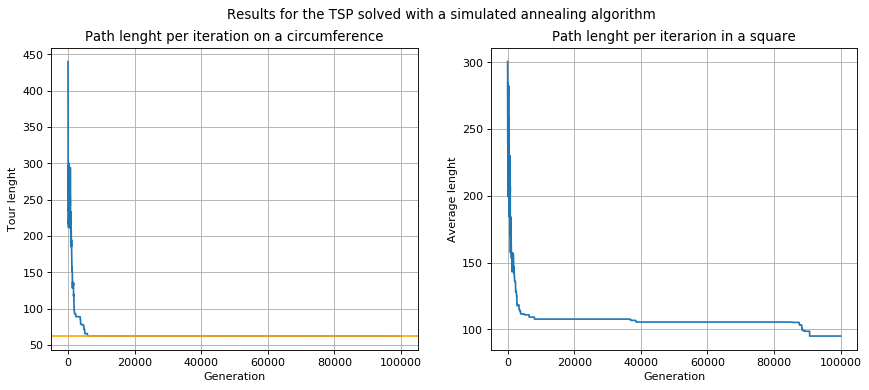

In [6]:
data1=open("results/best_circle_annealing.dat",'r').read().split('\n')
data2=open("results/best_square_annealing.dat",'r').read().split('\n')


data1=[x.split(',') for x in data1]
data2=[x.split(',') for x in data2]

x1=[]
y1=[]
y2=[]

for i in range(len(data1)-1):
    x1.append(float(data1[i][0]))
    y1.append(float(data1[i][2]))
    y2.append(float(data2[i][2]))
    
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5), dpi=80)

fig.suptitle("Results for the TSP solved with a simulated annealing algorithm")

ax1.plot(x1,y1)
ax1.set_title('Path lenght per iteration on a circumference')
ax1.set(xlabel='Generation', ylabel='Tour lenght')
ax1.axhline(62,color="orange")
ax1.grid(True)


ax2.plot(x1,y2)
ax2.set_title('Path lenght per iterarion in a square')
ax2.set(xlabel='Generation', ylabel='Average lenght')
ax2.grid(True)

plt.show()
plt.close()


We can see that the circle case reaches the best possible path a lot before the $10^{5}$-th iteration, since it is the simpler case, but for the best path in the square case we need more steps. 

The best path found for each case is

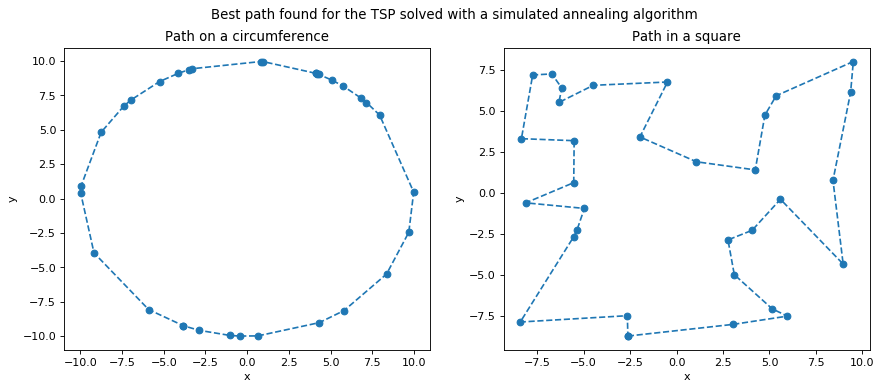

In [7]:
ce_best_ind=np.loadtxt("results/ind_circle_annealing.dat")
ce_best_ind=[int(x) for x in ce_best_ind]

se_best_ind=np.loadtxt("results/ind_square_annealing.dat")
se_best_ind=[int(x) for x in se_best_ind]

xb=np.zeros(len(circle)+1)
yb=np.zeros(len(circle)+1)
xb2=np.zeros(len(square)+1)
yb2=np.zeros(len(square)+1)




for i in range(len(circle)):
    xb[i]=circle[ce_best_ind[i]][0]
    yb[i]=circle[ce_best_ind[i]][1]
    
for i in range(len(square)):
    xb2[i]=square[se_best_ind[i]][0]
    yb2[i]=square[se_best_ind[i]][1]
    
xb[len(circle)]=xb[0]
yb[len(circle)]=yb[0]

xb2[len(square)]=xb2[0]
yb2[len(square)]=yb2[0]

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5), dpi=80)

fig.suptitle("Best path found for the TSP solved with a simulated annealing algorithm")


ax1.plot(xb,yb, marker='o',linestyle='dashed')
ax1.set_title('Path on a circumference')
ax1.set(xlabel='x', ylabel='y')

ax2.plot(xb2,yb2, marker='o',linestyle='dashed')
ax2.set_title('Path in a square')
ax2.set(xlabel='x', ylabel='y')

plt.show()
plt.close()

These results are comparable with those obtained with the genetic algorithm in the previous lesson. The GA, due to the fact that every population contained $10^{3}$ individuals, needed fewer iterations ($\sim 500$), while here for a single individual we had to iterate $10^{5}$ times.

|                                || Circumference | Square      |
|--------------------------------||---------------|-------------|
| **Genetic algorithm**          ||   62.4698     |  94.9176    |
| **Simulated annealing**        ||   62.4698     |  94.9885    |

### EXERCISE 10.2